# Import Libraries

In [1]:
import numpy 
import pandas 
import keras 
import tensorflow as tf 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Load Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300, n_features= 2, centers= 2, cluster_std= 1.0, random_state= 101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise], axis=1)
feat.columns = ['X1','X2','X3']

In [7]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


# Visualization

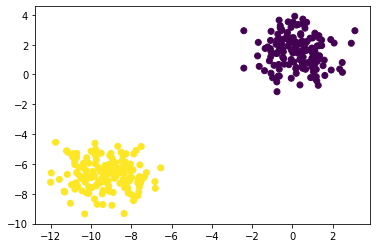

In [8]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# %matplotlib notebook 

<IPython.core.display.Javascript object>


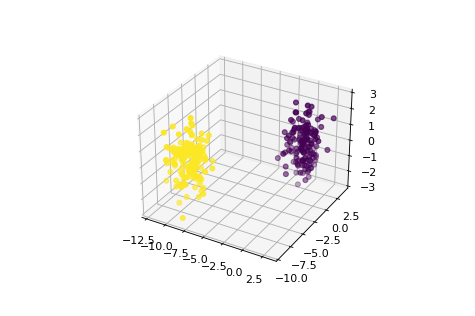

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder & Decoder

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [14]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [15]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

C:\Users\sony\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [18]:
scaled_data

array([[2.07475524e-01, 1.95571963e-01, 9.85845750e-01],
       [8.35929679e-01, 9.39652004e-01, 6.09403243e-01],
       [7.78344698e-01, 9.18055791e-01, 6.60079904e-01],
       [2.76123683e-01, 8.64187747e-02, 5.86892040e-01],
       [6.89943218e-02, 1.48018660e-01, 6.13565724e-01],
       [7.93328662e-02, 2.66181866e-01, 4.37825912e-01],
       [8.58345111e-01, 7.43675286e-01, 3.42071017e-01],
       [1.13649812e-01, 1.61015757e-01, 6.05388874e-01],
       [7.97071012e-01, 9.69575837e-01, 1.30174900e-01],
       [8.04420781e-01, 8.70758874e-01, 6.29683804e-01],
       [1.45851346e-01, 3.01543367e-01, 5.91417162e-01],
       [5.50858487e-02, 2.00066208e-01, 3.88988121e-01],
       [8.28535567e-01, 9.61146391e-01, 5.29823913e-01],
       [2.59466086e-01, 1.83035970e-01, 3.58225464e-01],
       [8.67698238e-01, 7.58466630e-01, 3.26649038e-01],
       [2.98886547e-01, 1.72814182e-01, 6.68607073e-01],
       [7.44511367e-01, 8.79978328e-01, 5.30204031e-01],
       [8.41866546e-01, 8.28631

In [19]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.2213
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2203
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2200
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2201


In [20]:
encoded_2dim = encoder.predict(scaled_data)

In [21]:
encoded_2dim

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.15437746e+00],
       [0.00000000e+00, 1.06907797e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.09775960e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.27068591e+00],
       [0.00000000e+00, 1.06583858e+00],
       [0.00000000e+00, 1.05677396e-02],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.18550169e+00],
       [0.00000000e+00, 9.11970586e-02],
       [0.00000000e+00, 1.12224710e+00],
       [0.00000000e+00, 3.65012139e-02],
       [0.00000000e+00, 1.04286206e+00],
       [0.00000000e+00, 1.00813603e+00],
       [0.00000000e+00, 8.68048847e-01],
       [0.00000000e+00, 9.88208473e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.06105280e+00],
       [0.00000000e+00, 1.28285408e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

# Visualization

In [26]:
# plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1])